In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv("E:\\credit\\cereals2.csv")

In [19]:
newdf = data.loc[:,['calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins','rating']]
print(newdf.head())

   calories  protein  fat  sodium  fiber  carbo  sugars  potass  vitamins  \
0        70        4    1     130   10.0    5.0       6     280        25   
1       120        3    5      15    2.0    8.0       8     135         0   
2        70        4    1     260    9.0    7.0       5     320        25   
3        50        4    0     140   14.0    8.0       0     330        25   
4       110        2    2     200    1.0   14.0       8      -1        25   

      rating  
0  68.402973  
1  33.983679  
2  59.425505  
3  93.704912  
4  34.384843  


In [20]:
import numpy as np
import statsmodels.api as sm 
import statsmodels.formula.api as smf

In [26]:
results = smf.ols('rating ~ sugars+fat+fiber',data=newdf).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     156.7
Date:                Fri, 15 Mar 2019   Prob (F-statistic):           5.47e-31
Time:                        22:29:20   Log-Likelihood:                -225.65
No. Observations:                  74   AIC:                             459.3
Df Residuals:                      70   BIC:                             468.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.7566      1.370     39.236      0.0

In [24]:
newdf.corr()


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,rating
calories,1.000000,-0.071648,0.425627,0.354206,-0.355982,0.256388,0.547685,-0.158991,0.297116,-0.712054
protein,-0.071648,1.000000,0.143655,-0.039885,0.498610,-0.143227,-0.381669,0.532237,0.013806,0.504070
fat,0.425627,0.143655,1.000000,0.019642,-0.020329,-0.350141,0.229358,0.129051,-0.022762,-0.407215
sodium,0.354206,-0.039885,0.019642,1.000000,-0.067327,0.362717,0.114690,-0.020719,0.361351,-0.409548
fiber,-0.355982,0.498610,-0.020329,-0.067327,1.000000,-0.355039,-0.165885,0.906521,-0.028791,0.600230
carbo,0.256388,-0.143227,-0.350141,0.362717,-0.355039,1.000000,-0.340435,-0.359012,0.259354,0.055804
sugars,0.547685,-0.381669,0.229358,0.114690,-0.165885,-0.340435,1.000000,-0.019051,0.132193,-0.760031
potass,-0.158991,0.532237,0.129051,-0.020719,0.906521,-0.359012,-0.019051,1.000000,0.028586,0.410556
vitamins,0.297116,0.013806,-0.022762,0.361351,-0.028791,0.259354,0.132193,0.028586,1.000000,-0.243780
rating,-0.712054,0.504070,-0.407215,-0.409548,0.600230,0.055804,-0.760031,0.410556,-0.243780,1.000000


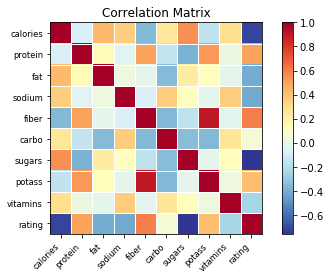

In [27]:
import statsmodels.graphics.api as smg
corr_matrix = np.corrcoef(newdf.T)
smg.plot_corr(corr_matrix, xnames=newdf.columns)
plt.show()

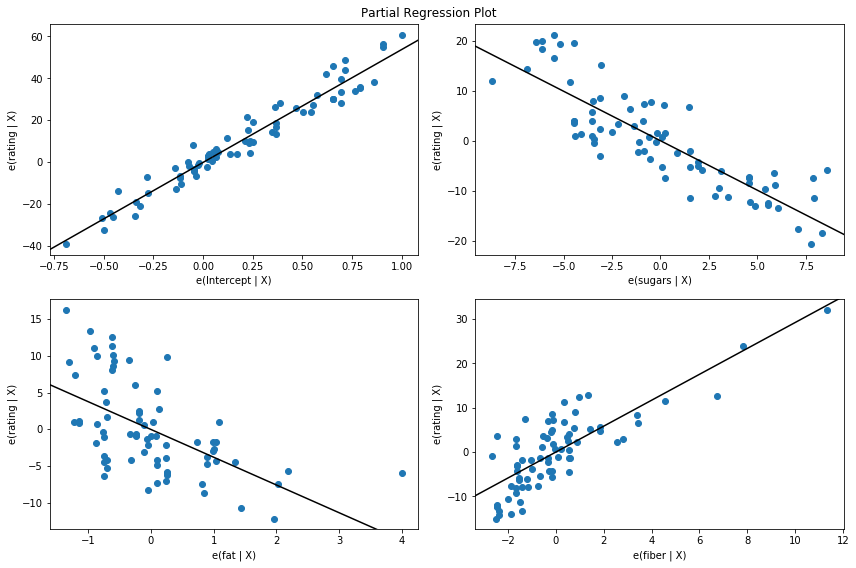

In [28]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(results, fig=fig)